In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Adaptación para que los datos obtenidos sean mas faciles de manejar**

In [4]:
df = pd.read_csv('Encuesta sobre el Poder Adquisitivo de Jóvenes Venezolanos (Respuestas).csv', index_col="Dirección de correo electrónico")
df.index.name = 'email'
df.drop('Marca temporal', axis=1, inplace=True)
df.rename(columns={'¿Cuál es tu edad?\nSi su edad se sale del rango establecido por favor absténgase de responder la encuesta ':'edad',
                   '¿En qué estado de Venezuela resides?': 'estado',
                    '¿Cuál es su nivel de formación actual? ' : 'formacion',
                    '¿Cuál es su ocupación principal?': 'ocupacion',
                    '¿Tu universidad es una institución educativa pública o privada?  ': 'universidad',
                    '  ¿En tu universidad, el año académico se organiza en semestres, trimestres o períodos anuales?  ' : 'periodo_clase',
                    '¿En cuál de las siguientes categorías se encuentra tu empleo actual?' : 'tipo_trabajo',
                    '  ¿En qué moneda recibes principalmente tu salario?  ' : 'moneda',
                    '¿Cuál es tu ingreso mensual promedio? ' : 'salario',
                    'Rellena los ítems que correspondan a las necesidades básicas que cubres con tus ingresos propios': 'gastos',
                    'Basado en la respuesta anterior ¿Cuál es el rango de tu gasto mensual en VIVIENDA?\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.' : 'rango_vivienda',
                    '¿Cuál es el rango de tu gasto mensual en ALIMENTACIÓN?\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.' : 'rango_alimentacion',
                    '¿Cuál es el rango de tu gasto mensual en TRANSPORTE?\nSi no cubres esta necesidad con tus ingresos, seleccionar 0.' : 'rango_transporte',
                    '¿Costeas actividades extracurriculares?\nSi es así, por favor indicar cuales.' : 'act_extracurricular',
                    'Basado en la respuesta anterior ¿Cuál es tu inversión mensual en estas actividades?' : 'rango_extracurricular',
                    '¿Sueles guardar de tus ingresos una reserva de dinero mensual?' : 'bool_ahorro',
                    'Si guardas una reserva mensual ¿Cuál es el rango de esta reserva?' : 'rango_ahorro',
                    '¿Consideras tener algún tipo de educación financiera? ' : 'educacion_financiera',
                    '¿Te gustaría aprender más sobre gestión de ingresos y educación financiera? ' : 'bool_educacion_financiera',
                    ' ¿Cómo calificarías tu nivel de vida actual en comparación con hace un año?' : 'nivel_vida',
                    '¿Qué tan satisfecho estás con tus ingresos actuales para cubrir tus necesidades? ' : 'nivel_complacidad'}
                   , inplace=True)

df.to_csv('EncuestaPA_JV.csv')
df

,edad,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,rango_alimentacion,rango_transporte,act_extracurricular,rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
manuelmaldonado408@gmail.com,18 a 20 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$40 a $60,no tengo actividades extracurriculares,$0,Sí,Más de $80,No,Sí,Mejor.,Neutral.
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,Sí,Más de $80,Sí,Sí,Mucho mejor.,Bastante satisfecho.
luiscogollom.2004@gmail.com,21 a 23 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$80 a $120.,"Vivienda., Alimentación",...,$20 a $40,$0,No aplica.,$0,No,$0,Sí,Sí,Peor.,Nada satisfecho.
cabrileskevin9@gmail.com,18 a 20 años.,Miranda,Bachiller,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mucho mejor.,Neutral.
genesisyeimardelgado@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante.,Pública.,Periodos anuales.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marquez.sosa.mariangel@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,Más de $100,$20 a $40,Gimnasio,$10 a $30,Sí,$20 a $50,Sí,Sí,Mejor.,Neutral.
katiuskamrc@gmail.com,21 a 23 años.,Barinas,Universitario.,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
ironmarquez403@gmail.com,21 a 23 años.,Barinas,Universitario.,Empleado o emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Combinación de bolívares y dólares,$240 a $280,"Vivienda., Alimentación, Transporte",...,$60 a $80,$40 a $60,No aplica.,$0,Sí,$50 a $80,Sí,Sí,Peor.,Neutral.


**Estados de Venezuela Encuestados**

In [4]:
nueva_columna = df['estado']
estados_venezuela = pd.DataFrame(nueva_columna)
def comparar_personas_venezuela(df, columna_estado):
    # Filtramos el DataFrame para eliminar filas con valores faltantes 
    df_filtrado = df.dropna(subset=[columna_estado])

    # Obtenemos los estados únicos y contamos cuántas veces aparece cada uno
    estados_unicos = df_filtrado[columna_estado].unique()
    conteo_estados = df_filtrado[columna_estado].value_counts()

    # Creamos un DataFrame para el gráfico
    data = {'Estado': estados_unicos, 'Cantidad': conteo_estados}
    df_grafico = pd.DataFrame(data).reset_index(drop=True)

    # Calculamos el total de personas y el porcentaje para cada estado
    total_personas = conteo_estados.sum()
    df_grafico['Porcentaje'] = (df_grafico['Cantidad'] / total_personas) * 100

    # Creamos la figura y el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(df_grafico['Estado'], df_grafico['Cantidad'], width=0.8, color="lightblue")
    plt.title('Distribución de personas por estado en Venezuela')
    plt.xlabel('Estados')
    plt.ylabel('Cantidad de personas')
    plt.xticks(rotation=45)
    plt.ylim(0, df_grafico['Cantidad'].max() * 1.1)

    # Agregamos etiquetas de datos con los porcentajes
    for i in range(len(df_grafico)):
        plt.text(df_grafico['Estado'].iloc[i], df_grafico['Porcentaje'].iloc[i], f"{df_grafico['Porcentaje'].iloc[i]:.2f}%", ha='center', va='bottom', fontsize=9)

    
    plt.show()

comparar_personas_venezuela(estados_venezuela.copy(), 'estado')

NameError: name 'df' is not defined

**Se separan las personas empleadas con aquellas sin empleo**

In [5]:
def dividir_datos_segun_empleo(df):
    """
    Divide el DataFrame en dos: personas con empleo y personas sin empleo.
    Args:
        df (DataFrame): El DataFrame con los datos a dividir.
    Returns:
        tuple: Dos DataFrames, uno con personas con empleo y otro con personas sin empleo.
    """
    con_empleo = df[df['ocupacion'].isin(['Estudiante y empleado.', 'Empleado o emprendedor.'])]
    sin_empleo = df[~df['ocupacion'].isin(['Estudiante y empleado.', 'Empleado o emprendedor.'])]

    return con_empleo, sin_empleo


df_con_empleo, df_sin_empleo = dividir_datos_segun_empleo(df)

# Empleados
df_con_empleo

NameError: name 'df' is not defined

In [10]:
# Desempleados
df_sin_empleo

,edad,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,rango_alimentacion,rango_transporte,act_extracurricular,rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,Sí,Más de $80,Sí,Sí,Mucho mejor.,Bastante satisfecho.
cabrileskevin9@gmail.com,18 a 20 años.,Miranda,Bachiller,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mucho mejor.,Neutral.
genesisyeimardelgado@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante.,Pública.,Periodos anuales.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
mariajosefuentesabreu@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mejor.,Poco satisfecho.
Conesivanna@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Vivienda., Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$50 a $70,No,$0,Sí,Sí,Igual.,Nada satisfecho.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marquez.sosa.mariangel@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,Más de $100,$20 a $40,Gimnasio,$10 a $30,Sí,$20 a $50,Sí,Sí,Mejor.,Neutral.
katiuskamrc@gmail.com,21 a 23 años.,Barinas,Universitario.,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
ironmarquez403@gmail.com,21 a 23 años.,Barinas,Universitario.,Empleado o emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Combinación de bolívares y dólares,$240 a $280,"Vivienda., Alimentación, Transporte",...,$60 a $80,$40 a $60,No aplica.,$0,Sí,$50 a $80,Sí,Sí,Peor.,Neutral.


**Modificacion a las columnas para que aquellas que diga "Si" y "No" se reemplazen con 1 y 0**

In [11]:
def reemplazar_valores_multiple_columnas(df, columnas, reemplazo_si, reemplazo_no): 
    for col in columnas:
        if col not in df.columns:
            continue
        # Usa .loc para modificar la columna en el DataFrame original
        df.loc[:, col] = df[col].replace({'Sí': reemplazo_si, 'No': reemplazo_no})
    
    # Filtra valores nulos
    df = df.dropna(subset=columnas)



columnas_a_modificar = ['bool_ahorro', 'educacion_financiera', 'bool_educacion_financiera']

reemplazar_valores_multiple_columnas(df, columnas_a_modificar, 1, 0)

df.head(len(df))

C:\Users\Gilian\AppData\Local\Temp\ipykernel_12264\1462665610.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].replace({'Sí': reemplazo_si, 'No': reemplazo_no})


,edad,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,rango_alimentacion,rango_transporte,act_extracurricular,rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
manuelmaldonado408@gmail.com,18 a 20 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$40 a $60,no tengo actividades extracurriculares,$0,1.0,Más de $80,0.0,1.0,Mejor.,Neutral.
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,1.0,Más de $80,1.0,1.0,Mucho mejor.,Bastante satisfecho.
luiscogollom.2004@gmail.com,21 a 23 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$80 a $120.,"Vivienda., Alimentación",...,$20 a $40,$0,No aplica.,$0,0.0,$0,1.0,1.0,Peor.,Nada satisfecho.
cabrileskevin9@gmail.com,18 a 20 años.,Miranda,Bachiller,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mucho mejor.,Neutral.
genesisyeimardelgado@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante.,Pública.,Periodos anuales.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marquez.sosa.mariangel@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,Más de $100,$20 a $40,Gimnasio,$10 a $30,1.0,$20 a $50,1.0,1.0,Mejor.,Neutral.
katiuskamrc@gmail.com,21 a 23 años.,Barinas,Universitario.,Estudiante.,Pública.,Semestre.,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Igual.,Neutral.
ironmarquez403@gmail.com,21 a 23 años.,Barinas,Universitario.,Empleado o emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Combinación de bolívares y dólares,$240 a $280,"Vivienda., Alimentación, Transporte",...,$60 a $80,$40 a $60,No aplica.,$0,1.0,$50 a $80,1.0,1.0,Peor.,Neutral.


**Eliminar aquellos registros cuyos gastos, salario y gastos por vivienda sea 0.**

In [54]:
def limpiar_datos_monetarios(df, columnas, valores_a_eliminar=["$0", "$0."]):
    """
    Filtra filas de un archivo CSV eliminando aquellas que contienen valores 
    no deseados en las columnas monetarias indicadas.

    Args:
        file_path (str): Ruta del archivo CSV.
        columnas (list): Columnas con datos monetarios a filtrar.
        valores_a_eliminar (list, opcional): Valores a eliminar, por defecto ["$0", "$0."].

    Returns:
        pd.DataFrame: DataFrame con las filas filtradas.
    """
    data = df.copy()
    data.columns = data.columns.str.strip()
    data[columnas] = data[columnas].astype(str)
    condition = ~data[columnas].isin(valores_a_eliminar).any(axis=1)
    filtered_data = data[condition]
    return filtered_data

columnas_a_filtrar = ["salario", "gastos", "rango_vivienda"]
valores_a_eliminar = ["$0", "$0."]
datos_filtrados = limpiar_datos_monetarios(df, columnas_a_filtrar, valores_a_eliminar)

print(datos_filtrados.info())
print(datos_filtrados.head())


<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, luiscogollom.2004@gmail.com to luriannysj@gmail.com
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       172 non-null    object
 1   estado                     172 non-null    object
 2   formacion                  172 non-null    object
 3   ocupacion                  172 non-null    object
 4   universidad                170 non-null    object
 5   periodo_clase              170 non-null    object
 6   tipo_trabajo               56 non-null     object
 7   moneda                     56 non-null     object
 8   salario                    172 non-null    object
 9   gastos                     172 non-null    object
 10  rango_vivienda             172 non-null    object
 11  rango_alimentacion         56 non-null     object
 12  rango_transporte           56 non-null     object
 13  act_extracurricular        

**Filtrar entre aquellos que posean gastos en actividades estracurriculares.**

In [13]:
def filtrar_dataframe(df, columna, valores_a_eliminar, indice='email'):
    mascara = ~df[columna].isin(valores_a_eliminar)
    df_filtrado = df[mascara]
    return df_filtrado

valores_a_eliminar = ['No aplica.', np.nan, 'no tengo actividades extracurriculares']
columna_a_filtrar = 'act_extracurricular'

df_filtrado = filtrar_dataframe(df, columna_a_filtrar, valores_a_eliminar)

df_filtrado.head(len(df_filtrado))

,edad,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,rango_alimentacion,rango_transporte,act_extracurricular,rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
noriigonza8@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Combinación de bolívares y dólares,$240 a $280,"Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$0,1.0,Más de $80,1.0,1.0,Mucho mejor.,Neutral.
Conesivanna@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Vivienda., Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$50 a $70,0.0,$0,1.0,1.0,Igual.,Nada satisfecho.
yusneipena08@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante y empleado.,Privada.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$40 a $80.,Alimentación,...,$20 a $40,$0,Deporte,$10 a $30,1.0,$0 a $10,0.0,1.0,Mucho mejor.,Bastante satisfecho.
nandadevi97816@gmail.com,27 a 29 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$160 a $200.,"Vivienda., Alimentación, Transporte",...,$60 a $80,$20 a $40,Gimnasio,$10 a $30,1.0,$10 a $20,1.0,1.0,Igual.,Poco satisfecho.
veragabo2014@gmail.com,24 a 26 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$20 a $40,Gimnasio,$10 a $30,1.0,$20 a $50,0.0,1.0,Mejor.,Neutral.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
escoto8496@gmail.com,27 a 29 años.,Distrito Capital,Universitario.,Empleado o emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$120 a $160.,"Vivienda., Alimentación, Transporte",...,$20 a $40,$0,"Arte, CINE",$10 a $30,0.0,$0,1.0,1.0,Mucho mejor.,Poco satisfecho.
valeria.piva.ornela@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Periodos anuales.,"Trabajador independiente (freelance, emprended...",Combinación de bolívares y dólares,Menos $40.,"Alimentación, Transporte",...,$0,$20 a $40,Gimnasio,$10 a $30,1.0,$0 a $10,0.0,1.0,Mejor.,Poco satisfecho.
gameplayscons@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$80 a $120.,Vivienda.,...,$20 a $40,$20 a $40,"Gimnasio, Deporte, Música, Canto",$10 a $30,1.0,$20 a $50,1.0,1.0,Mejor.,Poco satisfecho.


**Eliminar aquellos registros cuyos gastos por vivienda sea 0.**


In [3]:
def filtrar_gasto_vivienda(df, columna_gasto_vivienda, valores_sin_gasto=["0", "$0", "$0."]):
    """
    Filtra el DataFrame para incluir solo quienes tienen gastos en vivienda,
    excluyendo valores que indiquen falta de gasto.

    Args:
        df (DataFrame): El DataFrame original.
        columna_gasto_vivienda (str): La columna que contiene el gasto en vivienda.
        valores_sin_gasto (list): Lista de valores que indican "sin gasto".

    Returns:
        DataFrame: Un DataFrame con solo quienes tienen gastos en vivienda.
    """
    # Filtramos filas donde el gasto en vivienda no está en los valores sin gasto
    df_con_gasto_vivienda = df[~df[columna_gasto_vivienda].isin(valores_sin_gasto)]
    return df_con_gasto_vivienda

# Filtramos el DataFrame original para incluir solo aquellos que reportan un gasto en vivienda
df_gasto_vivienda = filtrar_gasto_vivienda(df, "rango_vivienda")
df_gasto_vivienda.head(len(df_gasto_vivienda))
df_gasto_vivienda["rango_vivienda"]

NameError: name 'df' is not defined

**Filtrar entre aquellos que poseen gastos por transporte**

In [16]:
limpieza = df[(df["rango_transporte"].notnull()) & (df["rango_transporte"] != "$0")]
rango_transporte = limpieza["rango_transporte"]
moda_transporte = rango_transporte.mode()
conteo_transporte = rango_transporte.value_counts()
conteo_porcentual_transporte = (conteo_transporte/conteo_transporte.sum())*100
conteo_porcentual_transporte

rango_transporte
$20 a $40     77.358491
$40 a $60     13.207547
Más de $80     5.660377
$60 a $80      3.773585
Name: count, dtype: float64

**Filtrado por aquellos que posee gastos en alimentación.**

In [18]:
def filtrar_gasto_alimentacion(df, columna_gasto_alimentacion, valores_sin_gasto=["0", "$0", "$0."]):
    """
    Filtra el DataFrame para incluir solo quienes tienen gastos en alimentación,
    excluyendo valores que indiquen falta de gasto o NaN.

    Args:
        df (DataFrame): El DataFrame original.
        columna_gasto_alimentacion (str): La columna que contiene el gasto en alimentación.
        valores_sin_gasto (list): Lista de valores que indican "sin gasto".

    Returns:
        DataFrame: Un DataFrame con solo quienes tienen gastos en alimentación.
    """
    # Excluir filas donde el gasto en alimentación es NaN o está en los valores sin gasto
    df_con_gasto_alimentacion = df[~df[columna_gasto_alimentacion].isin(valores_sin_gasto) & df[columna_gasto_alimentacion].notna()]
    return df_con_gasto_alimentacion

# Filtramos el DataFrame original para incluir solo aquellos que reportan un gasto en alimentación
df_gasto_alimentacion = filtrar_gasto_alimentacion(df, "rango_alimentacion")
df_gasto_alimentacion.head(len(df_gasto_alimentacion))


,edad,estado,formacion,ocupacion,universidad,periodo_clase,tipo_trabajo,moneda,salario,gastos,...,rango_alimentacion,rango_transporte,act_extracurricular,rango_extracurricular,bool_ahorro,rango_ahorro,educacion_financiera,bool_educacion_financiera,nivel_vida,nivel_complacidad
email,,,,,,,,,,,,,,,,,,,,,
manuelmaldonado408@gmail.com,18 a 20 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$240 a $280,"Alimentación, Transporte",...,$60 a $80,$40 a $60,no tengo actividades extracurriculares,$0,1.0,Más de $80,0.0,1.0,Mejor.,Neutral.
camachofloriana28@gmail.com,18 a 20 años.,Mérida,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$160 a $200.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,No aplica.,$0,1.0,Más de $80,1.0,1.0,Mucho mejor.,Bastante satisfecho.
luiscogollom.2004@gmail.com,21 a 23 años.,Mérida,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$80 a $120.,"Vivienda., Alimentación",...,$20 a $40,$0,No aplica.,$0,0.0,$0,1.0,1.0,Peor.,Nada satisfecho.
noriigonza8@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Estudiante y empleado.,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Combinación de bolívares y dólares,$240 a $280,"Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$0,1.0,Más de $80,1.0,1.0,Mucho mejor.,Neutral.
Conesivanna@gmail.com,18 a 20 años.,Distrito Capital,Bachiller,Empleado o emprendedor,No aplica,No aplica,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Vivienda., Alimentación, Transporte",...,$80 a $100,$40 a $60,Idiomas,$50 a $70,0.0,$0,1.0,1.0,Igual.,Nada satisfecho.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gameplayscons@gmail.com,18 a 20 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Sector público (gobierno, instituciones públic...",Bolívares,$80 a $120.,Vivienda.,...,$20 a $40,$20 a $40,"Gimnasio, Deporte, Música, Canto",$10 a $30,1.0,$20 a $50,1.0,1.0,Mejor.,Poco satisfecho.
boltronfizz@gmail.com,21 a 23 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Sector privado (empresas, organizaciones no gu...",Bolívares,$120 a $160.,"Alimentación, Transporte",...,$20 a $40,$20 a $40,Deporte,$10 a $30,1.0,$0 a $10,1.0,1.0,Mejor.,Neutral.
evkevinmarquez@gmail.com,21 a 23 años.,Mérida,Universitario.,Estudiante y empleado | Estudiante y emprendedor,Pública.,Semestre.,"Trabajador independiente (freelance, emprended...",Dólares estadounidenses,$80 a $120.,"Alimentación, Transporte",...,$60 a $80,$20 a $40,No aplica.,Más de $70,1.0,Más de $80,0.0,1.0,Mejor.,Neutral.


**Grafica de quienes trabajan en sector público, privado y de manera independiente.**

In [51]:
df["universidad"] = df["universidad"].fillna(df["universidad"].mode())
print(df[df["universidad"].isnull()])

df.info()

                                  edad            estado       formacion  \
email                                                                      
parragajenny1@gmail.com  27 a 29 años.        Portuguesa     Profesional   
xsdfsd@gmail.com         18 a 20 años.  Distrito Capital  Técnico Medio.   

                                      ocupacion universidad periodo_clase  \
email                                                                       
parragajenny1@gmail.com  Empleado o emprendedor         NaN           NaN   
xsdfsd@gmail.com                    Estudiante.         NaN           NaN   

                                                              tipo_trabajo  \
email                                                                        
parragajenny1@gmail.com  Trabajador independiente (freelance, emprended...   
xsdfsd@gmail.com                                                       NaN   

                                                     moneda      salario 

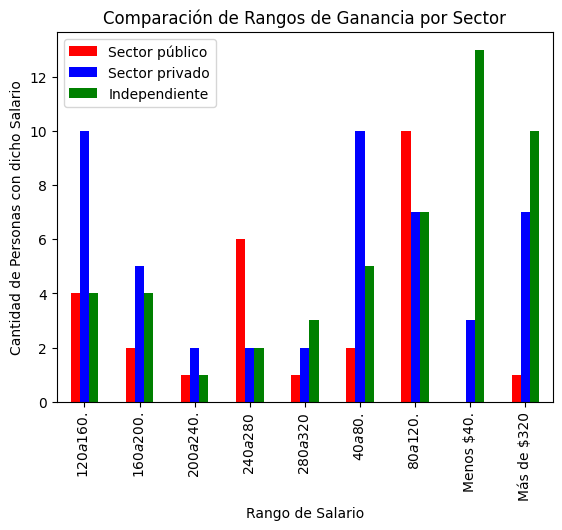

In [19]:
limpieza = df[df["tipo_trabajo"].notnull()]

def separacion(limpieza):
    publico = limpieza[limpieza["tipo_trabajo"].str.contains("público")]
    privado = limpieza[limpieza["tipo_trabajo"].str.contains("privado")]
    independiente = limpieza[limpieza["tipo_trabajo"].str.contains("independiente")]

    publico.loc[:,"tipo_trabajo"] = "publico"
    privado.loc[:,"tipo_trabajo"] = "privado"
    independiente.loc[:,"tipo_trabajo"] = "independiente"

    return publico, privado, independiente

sector_publico, sector_privado, sector_independiente = separacion(limpieza)

moda_salario_publico = sector_publico["salario"].mode()
conteo_salario_publico = sector_publico["salario"].value_counts()
conteo_porcentual_salario_publico = (conteo_salario_publico/conteo_salario_publico.sum())*100

moda_salario_privado = sector_privado["salario"].mode()
conteo_salario_privado = sector_privado["salario"].value_counts()
conteo_porcentual_salario_privado = (conteo_salario_privado/conteo_salario_privado.sum())*100

moda_salario_independiente = sector_independiente["salario"].mode()
conteo_salario_independiente = sector_independiente["salario"].value_counts()
conteo_porcentual_salario_independiente = (conteo_salario_independiente/conteo_salario_independiente.sum())*100

comparacion = pd.DataFrame({
    "Sector público": conteo_salario_publico,
    "Sector privado": conteo_salario_privado,
    "Independiente": conteo_salario_independiente
})

comparacion.plot(kind="bar", color = ["red", "blue", "green"])
plt.title("Comparación de Rangos de Ganancia por Sector")
plt.xlabel("Rango de Salario")
plt.ylabel("Cantidad de Personas con dicho Salario")
plt.show()